### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Pixel-Based Image Enhancement Algorithms**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Histogram-based image enhancement is widely used in digital image processing to improve the visibility of features and boost contrast in images. It is one of the fastest-growing areas in computer science, serving as a critical tool in fields such as medical imaging, remote sensing, and computer vision. Among its many techniques, methods like the median filter, contrast stretching, histogram equalization, negative image transformation, and power-law (gamma) transformation stand out as particularly effective for enhancing image quality and highlighting important details.

#### What Is an Image Histogram?

An image histogram provides a graphical representation of an image’s pixel intensity values. Practically, it can be viewed as a data structure that counts how many pixels occur at each intensity level. This information is invaluable for a variety of image processing operations, particularly those aiming to modify brightness, contrast, or detect specific intensity-related features.

<img src="./data/activity 2/Image_Histogram.png" alt="Histogram Example" width="400"/>

It is a graphical representation of the intensity distribution of an image.
It quantifies the number of pixels for each intensity value.
By analyzing the shape and spread of the histogram, one can select the most appropriate enhancement technique. For example, histogram equalization redistributes intensities for a more uniform distribution, whereas power-law (gamma) transformations brighten or darken specific ranges of the image.

#### What Is Histogram Equalization?

As mentioned above, histogram equalization is an image processing technique that adjusts an image’s contrast by spreading out the pixel intensity range. By stretching the intensity distribution, areas with low contrast gain higher contrast, thereby revealing more detail.

<img src="./data/activity 2/histogram_represent.png" alt="Histogram Equalization Example" width="400"/>

### Importing libraries

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import data, img_as_float
from skimage import exposure


### Loading Images

In [2]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')
teeth_img = Image.open("data/activity 2/teeth.jpeg")
x_ray_dental_img = Image.open("data/activity 2/xray_dental.jpg")

In [3]:
#Plot the original image and its histogram with the equalized image and its histogram
def plot_images(original_img, equalized_img):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(original_img, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    axs[0, 1].hist(np.array(original_img).flatten(), bins=256, range=(0, 256), density=True, color='r')
    axs[0, 1].set_title('Original Histogram')
    axs[1, 0].imshow(equalized_img, cmap='gray')
    axs[1, 0].set_title('Equalized Image')
    axs[1, 0].axis('off')
    axs[1, 1].hist(np.array(equalized_img).flatten(), bins=256, range=(0, 256), density=True, color='r')
    axs[1, 1].set_title('Equalized Histogram')
    plt.show()
    

### 1. Tile-based histogram equalization



The tile-based histogram equalization (TBHE) is a method that divides the image into tiles, for that reason, it is called tile-based. The optimal number of tiles is determined by the size of the image, and its determination requires some experimentation.

This method is used to improve the contrast of the image, and it is particularly useful when the image has regions with different illumination levels. This method is optimized to work with grayscale images, but it can be adapted to work with color images.

Some of the benefits of the TBHE method are:

* It is a simple method to implement.
* It is a fast method.
* It is a non-linear method, which means that it can improve the contrast of the image.

Although the AHE method is very useful, it has some drawbacks. One of the main drawbacks is that it can amplify the noise in the image. This is because the method is based on the histogram of the image, and the noise can be considered as a part of the histogram.


==== (8, 8) ====


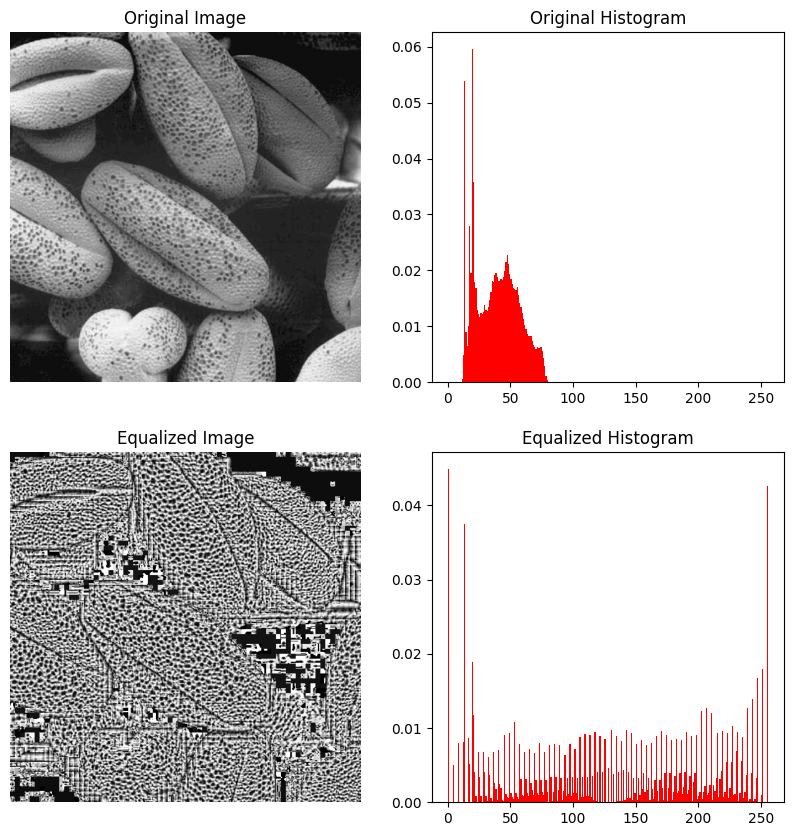

==== (16, 16) ====


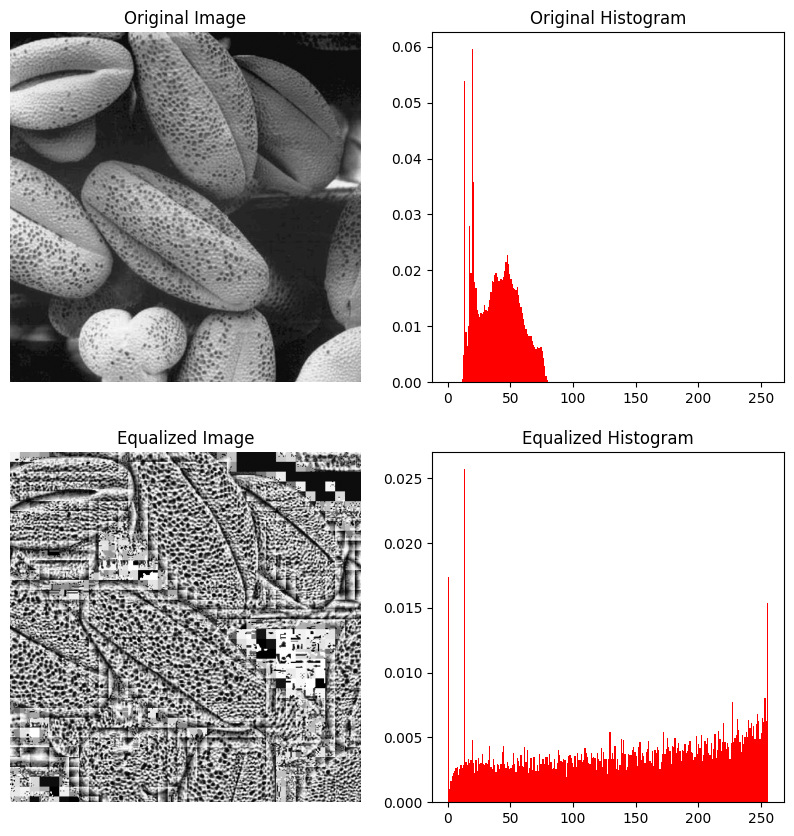

==== (32, 32) ====


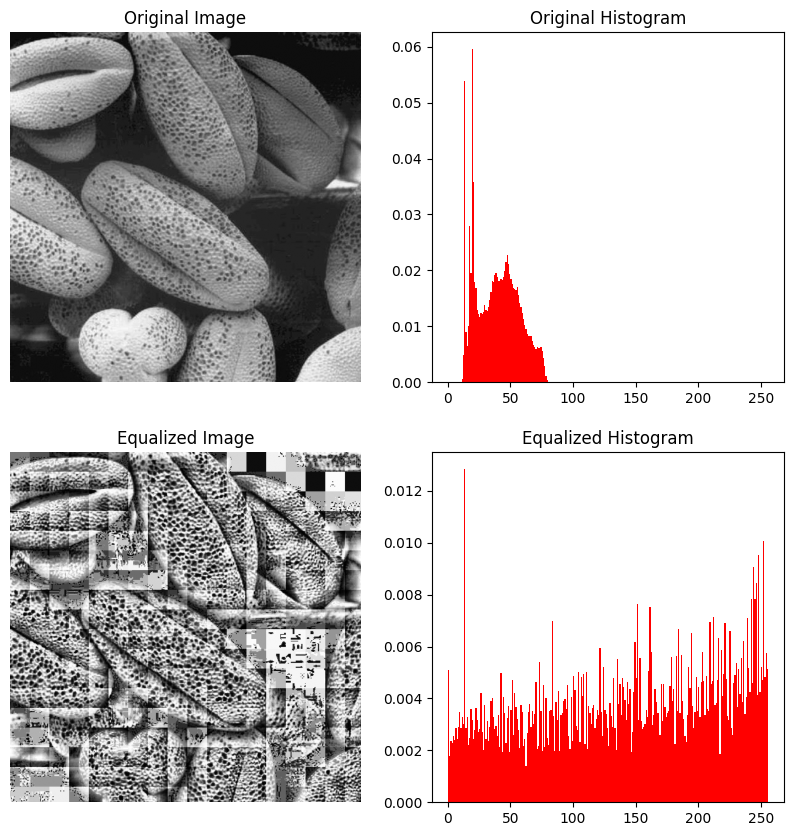

==== (64, 64) ====


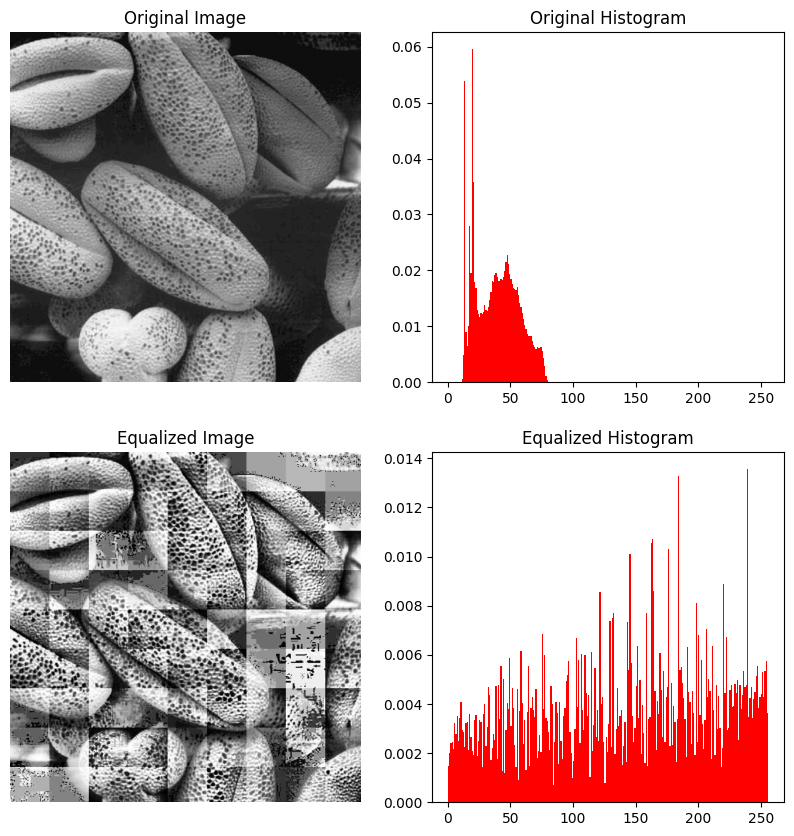

In [4]:
#Tile-based histogram equalization
def tile_based_histogram_equalization(image, tile_size=(8, 8)):
    h, w = image.shape
    tile_h, tile_w = tile_size
    pad_h = (tile_h - h % tile_h) % tile_h
    pad_w = (tile_w - w % tile_w) % tile_w
    padded_image = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)
    h_padded, w_padded = padded_image.shape
    output_image = np.zeros_like(padded_image)
    
    # move the window through the image
    for i in range(0, h_padded, tile_h):
        for j in range(0, w_padded, tile_w):
            tile = padded_image[i:i+tile_h, j:j+tile_w]
            equalized_tile = cv2.equalizeHist(tile)
            output_image[i:i+tile_h, j:j+tile_w] = equalized_tile
    
    output_image = output_image[:h, :w]
    return output_image

# Convert to grey the image
microscope_img_gray = np.array(microscope_img.convert('L'))

# differente tile sizes
tile_sizes = [(8, 8), (16, 16), (32, 32), (64, 64)]
for ts in tile_sizes:
    microscope_img_eq = tile_based_histogram_equalization(microscope_img_gray, ts)
    
    print(f"==== {ts} ====")
    plot_images(microscope_img_gray, microscope_img_eq)



With this activity we try with different tile sizes to see how the image changes. We can see that when the tile size is too small, the image is divided into many tiles, and the contrast is not improved. On the other hand, when the tile size is too large, the contrast is improved, but the image still has some regions with low contrast.

Also, when the tile size is too small, the method requires more computational resources because the image is divided into many tiles, that mentioned, the tile size must be chosen carefully to improve the contrast of the image without requiring too many computational resources.


Another drawback is that possible differences can be observed between the contrast of the blocks. How could this be improved? 

As saw on the previous images, we can see that all the image this algorith produced are rough with visible artifacts at the boundaries of the tiles. This is because the algorithm processes each tile separately and the histogram equalization algorithm is applied to each tile independently.

To improve the contrast of the blocks, we can use the following methods as mentioned by Härtinger y Steger (2024):
* Contrast stretching: We can use contrast stretching to improve the contrast of the blocks. This method stretches the histogram of the blocks to improve the contrast of the blocks.
* Window-based Histogram Equalization: We can use Windows to improve the contrast of the blocks, in this case, the window is a block of pixels and the histogram equalization is applied to
* Histogram clipping: We can use histogram clipping to improve the contrast of the blocks. This method clips the histogram of the blocks to improve the contrast of the blocks.
* Multilevel Histogram Equalization: We can use multilevel histogram equalization to improve the contrast of the blocks. This method divides the image into multiple levels and applies histogram equalization to each level to improve the contrast of the blocks.

As we can see, there are many methods to improve the contrast of the blocks. The best method depends on the image and the requirements of the application. In this notebook we will going to apply the window-based histogram equalization method to improve the contrast of the blocks  and the Contrast Limited Adaptive Histogram Equalization (CLAHE) method to improve the contrast of the image.





### 2. Sliding Window Adaptative Histogram Equalization (SWAHE)

Sliding Window Adaptive Histogram Equalization (SWAHE) is a method that divides the image into tiles and applies the adaptive histogram equalization algorithm to each tile. The main difference between the SWAHE and the TBHE method is that the SWAHE method uses a sliding window to divide the image into tiles, while the TBHE method uses a fixed window to divide the image into tiles.

This has some advantages, such as:
* Can better improve the contrast of the image, because the sliding window can adapt to the local contrast of the image.
* Reduce the number of artifacts in the image, because if provides smooth transitions between regions, eliminating these discontinuities.
* improves the visibility of the details in the image, because it can adapt to varying levels of detail and texture in different regions of the image.

The SWAHE method can by apply in a large number of images an areas, such as:
* Medical imaging: The SWAHE method can be used to improve the contrast of medical images, such as X-rays, MRIs, and CT scans.
* Satellite imaging: Improve the contrast of satellite images, such as aerial photographs and satellite images.
* Low-light imaging: Improve the contrast of low-light images, such as images taken at night or in low-light conditions.

The main dissadvantage of the SWAHE method is that it can be computationally expensive, because it requires the calculation of the histogram of each tile in the image. This can be a problem for large images or images with many tiles as seen on the work by Sund y Møystad (2006) where they had the problem of the computational cost but they also mentioned that the SWAHE method can be optimized to reduce the computational cost.

In [5]:
# Sliding window based Adaptive Histogram Equalization
def sliding_window_ae(image, window_size=16):
    # Convert to grayscale
    image = np.array(image.convert('L')) 
    # Get the image dimensions
    M, N = image.shape
    
    # Prepare the output image
    output_image = np.zeros_like(image, dtype=np.uint8)
    
    # Define the half-window size for easier boundary handling
    half_window = window_size // 2
    
    # Iterate over every pixel in the image
    for i in range(M):
        for j in range(N):
            # Define the local window boundaries
            x1 = max(i - half_window, 0)
            x2 = min(i + half_window, M - 1)
            y1 = max(j - half_window, 0)
            y2 = min(j + half_window, N - 1)
            
            # Extract the local window
            local_window = image[x1:x2+1, y1:y2+1]
            
            # Calculate the histogram of the local window
            hist, _ = np.histogram(local_window.flatten(), bins=256, range=[0, 256])
            
            # Calculate the cumulative distribution function (CDF)
            cdf = hist.cumsum()
            cdf_min, cdf_max = cdf.min(), cdf.max()
            
            # Avoid division by zero
            if cdf_max > cdf_min:  
                cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
                cdf_normalized = cdf_normalized.astype(np.uint8)
                # Apply histogram equalization to the current pixel
                output_image[i, j] = cdf_normalized[image[i, j]]
            else:
                # If the local window is uniform, keep the pixel intensity unchanged
                output_image[i, j] = image[i, j]
    
    return output_image

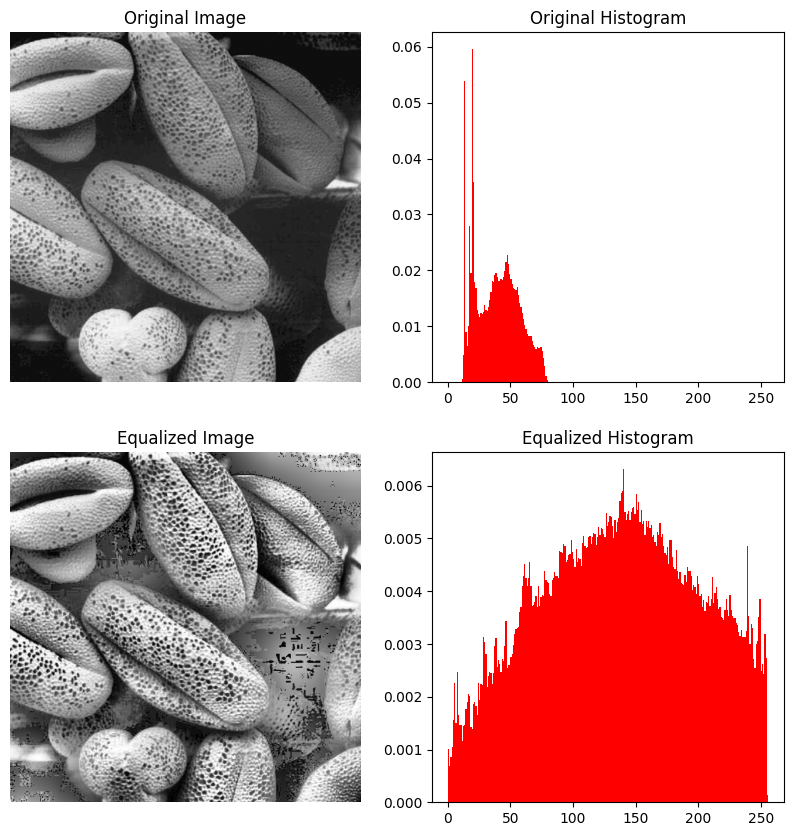

In [6]:
# Applying sliding window based adaptive histogram equalization
window_size = 128
microscope_img_eq = sliding_window_ae(microscope_img, window_size)
# Plotting images
plot_images(np.array(microscope_img.convert('L')), microscope_img_eq)

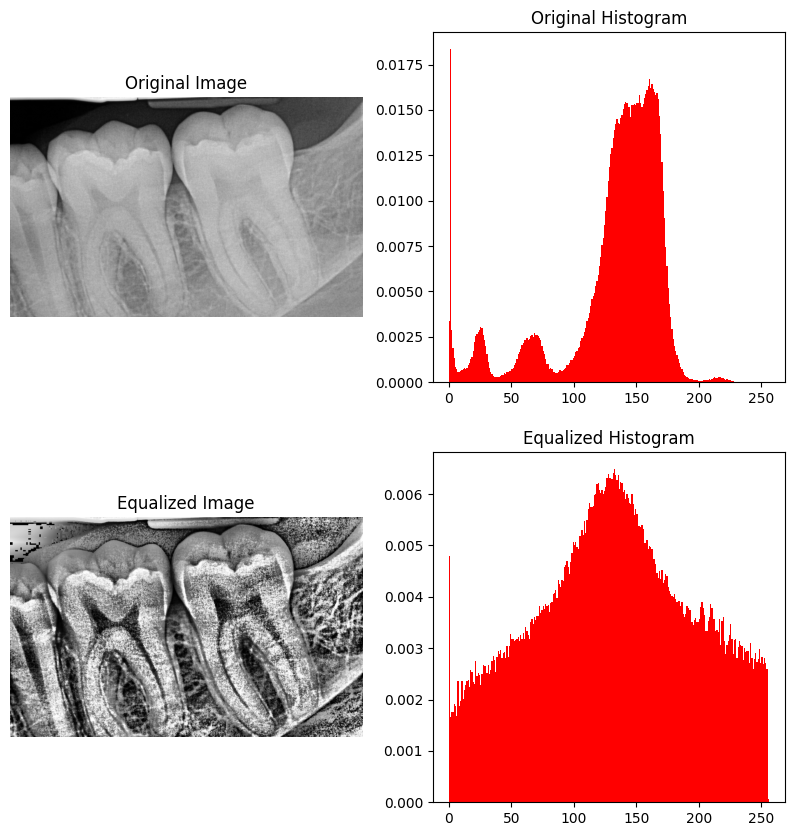

In [7]:
# Applying sliding window based adaptive histogram equalization
x_ray_dental_img_eq = sliding_window_ae(x_ray_dental_img, 128)
# Plotting images
plot_images(np.array(x_ray_dental_img.convert('L')), x_ray_dental_img_eq)

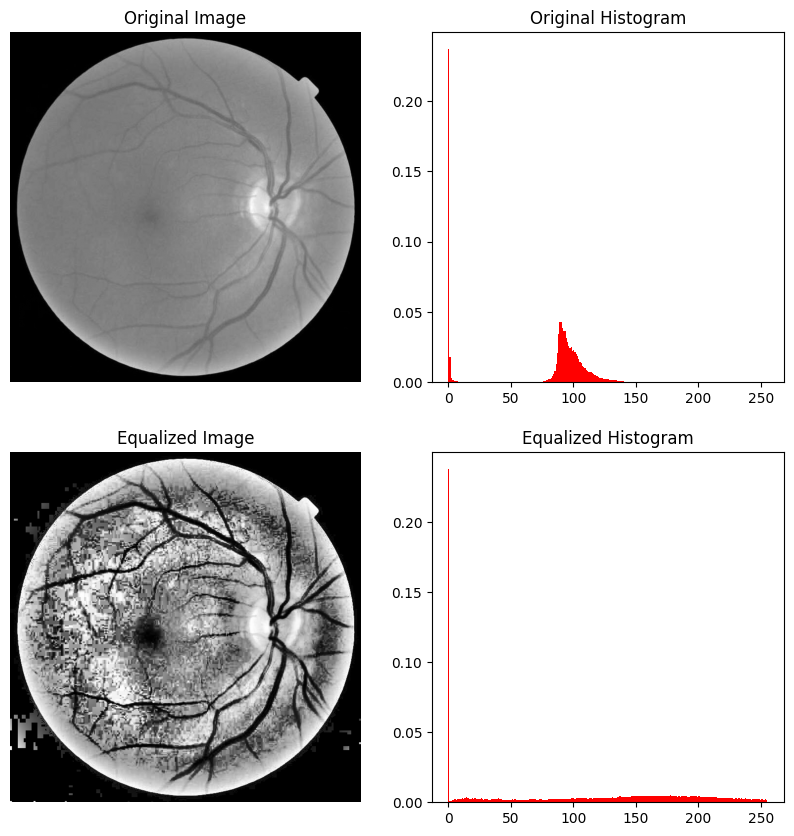

In [8]:
# Applying sliding window based adaptive histogram equalization
retina_img_eq = sliding_window_ae(retina_img, 128)
# Plotting images
plot_images(np.array(retina_img), retina_img_eq)

As we can see in the previous image, the SWAHE algorithm produced a better result than the tile-based histogram equalization algorithm. The SWAHE algorithm produced a smoother image with less visible artifacts at the boundaries of the tiles but if utilized more computational resources than the tile-based histogram equalization algorithm.

### 3. Contrast Limited Adaptative histogram Equalization 

CLAHE (Contrast Limited Adaptive Histogram Equalization) is an advanced image processing technique used to improve the contrast of an image. It is a variant of Adaptive Histogram Equalization (AHE) that aims to reduce the noise and amplification of artifacts that can occur in AHE.

Some of the key features of CLAHE are:
* Clahe divides the image into small blocks called tiles.
* The histogram of each tile is equalized.
* The contrast of the image is limited by clipping the histogram of each tile.
* The clipped histogram is then redistributed to improve the contrast of the image.
* After applying hisotgram equalization to each tile, CLAHE uses bilinear interpolation to smooth the transitions between the tiles.

The main difference between CLAHE and SWAHE is that CLAHE limits the contrast of the image by clipping the histogram of each tile. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:

This provides a more natural look to the image, as it prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts. The algorithm consists of the following steps:


=== Dog ===


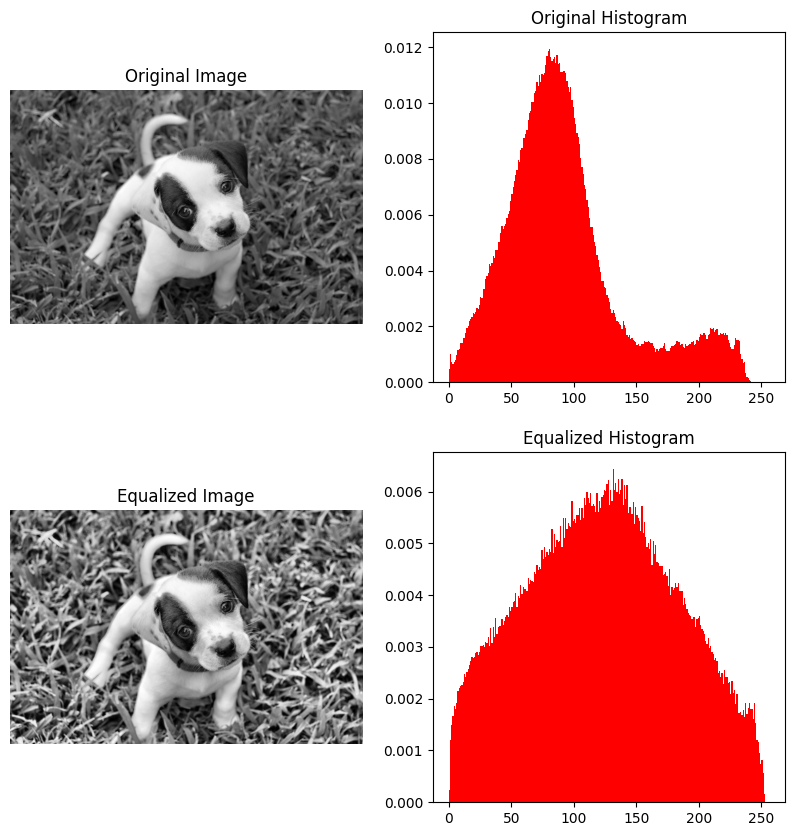

=== Dental X-Ray ===


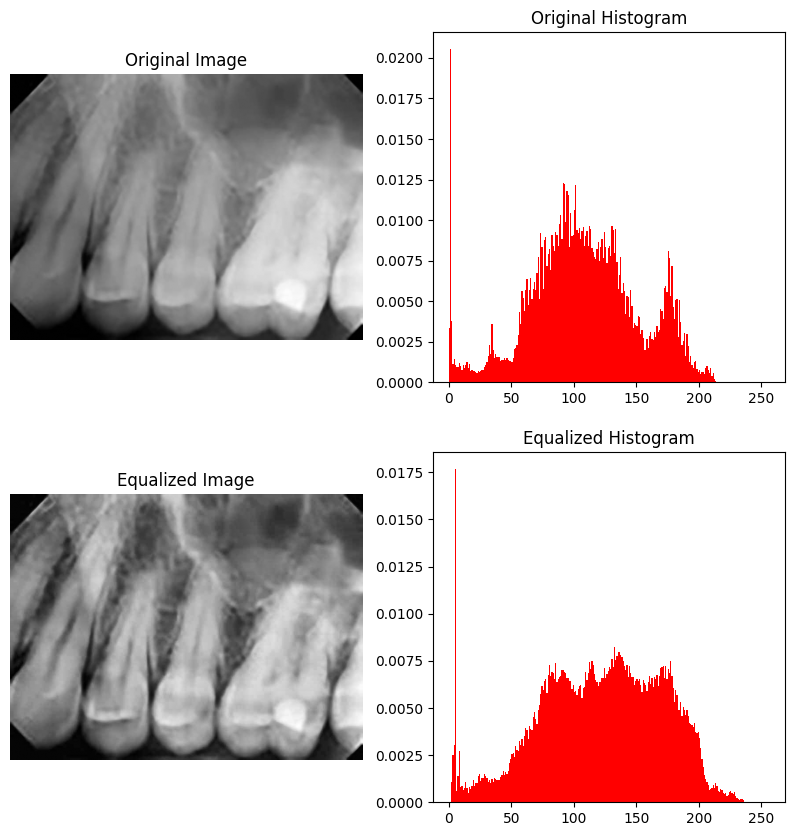

=== Microscope ===


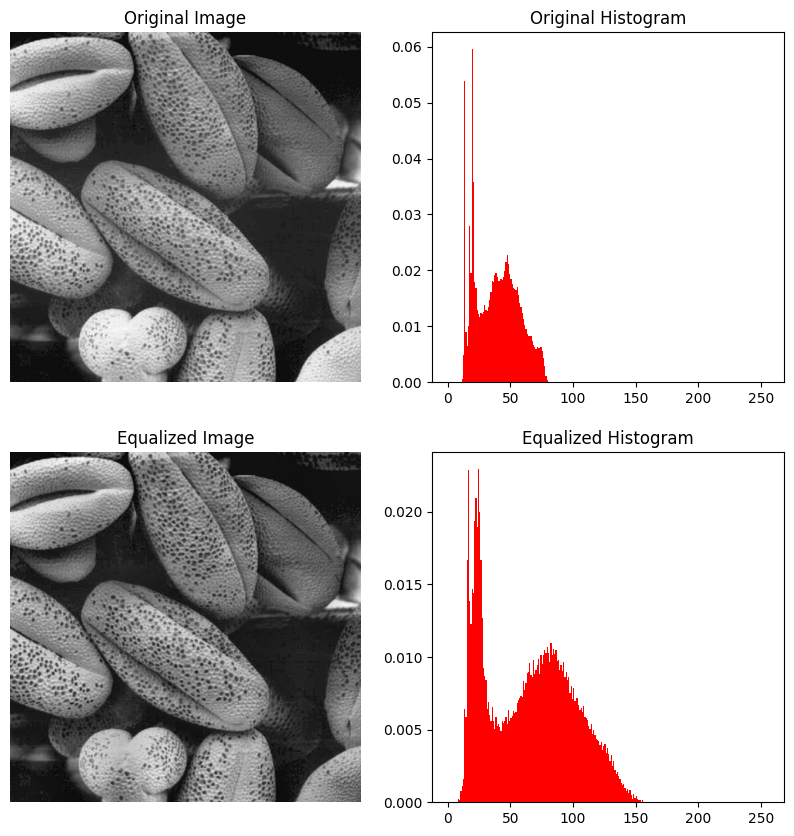

In [9]:
# Función de CLAHE
def clahe(img, clip_limit, grid_size):
    # Convertir a escala de grises
    gray_img = np.array(img.convert('L'))
    # Crear el objeto CLAHE
    clahe_obj = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(grid_size, grid_size))
    # Aplicar CLAHE
    return clahe_obj.apply(gray_img)

# Parámetros de CLAHE
clip_limit = 2.0
grid_size = 8

# Lista de imágenes y nombres
images_to_process = [
    (dog_img, "Dog"),
    (dental_img, "Dental X-Ray"),
    (microscope_img, "Microscope")
]

# Iterar y aplicar CLAHE a cada imagen
for (img, name) in images_to_process:
    # Aplicar CLAHE
    eq_img = clahe(img, clip_limit, grid_size)
    
    # Mostrar en consola qué imagen estamos procesando
    print(f"=== {name} ===")
    
    # Llamar a 'plot_images' con la imagen original (grayscale) y la ecualizada
    original_gray = np.array(img.convert('L'))
    plot_images(original_gray, eq_img)

As we can see, the **CLAHE** algorithm is similar to the **SWAHE** algorithm, but it includes an additional step to limit the contrast of the image. This is done by clipping the histogram of each tile to a specified contrast limit. This prevents the over-enhancement of the contrast in the image, which can lead to visible artifacts.

### Conclusion

Histogram equalization is especially helpful for images that appear washed out due to insufficient contrast. In such cases, the bright and dark areas merge into a flat image that lacks highlights and shadows.

In this notebook, we implemented three pixel-based image enhancement algorithms: tile-based histogram equalization, sliding window adaptive histogram equalization (SWAHE), and contrast-limited adaptive histogram equalization (CLAHE). We then applied these algorithms to a sample image and compared the results:

* Tile-Based Histogram Equalization (tile size = 64): Shows how local contrast can be enhanced, revealing fine textural details. However, the block-wise approach may introduce visible boundaries where tiles meet.
* Global Histogram Equalization: Produces a more uniform brightness distribution but can be less sensitive to subtle local variations.
* Adaptive Methods (SWAHE, CLAHE): Strive to combine the strengths of both global and local approaches while minimizing artifacts like excessive noise or block effects.

Overall, each method excels under different conditions. Tile-based methods suit images with uneven lighting or complex textures, whereas global methods maintain a more consistent contrast across the entire scene. More advanced methods like CLAHE can strike a balance between local detail enhancement and artifact suppression.

By understanding the advantages and limitations of each algorithm, practitioners can select or combine the techniques that best meet their requirements for detail enhancement, noise control, and overall image quality.

### References

* Gonzalez, R. & Woods, R. (2018). Digital Image Processing (4th ed.). Pearson.
* Härtinger, P., & Steger, C. (2024). Adaptive histogram equalization in constant time. Journal Of Real-Time Image Processing, 21(3). https://doi.org/10.1007/s11554-024-01465-1
* Karmatnspyphuntsho-Tijtech. (2019). Introduction to Image Processing using OpenCV in Google Colab
* Kyawsawhtoon. (2018). A Tutorial to Histogram Equalization
* OpenCV. (2021). Histogram Equalization Tutorial
* Sund, T., & Møystad, A. (2006). Sliding window adaptive histogram equalization of intraoral radiographs: effect on image quality. Dentomaxillofacial Radiology, 35(3), 133-138. https://doi.org/10.1259/dmfr/21936923
* Zuiderveld, K. (1994). Contrast limited adaptive histogram equalization. En Elsevier eBooks (pp. 474-485). https://doi.org/10.1016/b978-0-12-336156-1.50061-6